# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [112]:
df = pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')
df.describe()

,customer_id,postal_code,order_id,customer_id.1,order_id.1,product_id,quantity,product_id.1
count,9569.000000,9416.000000,9569.000000,9569.000000,9569.000000,9569.000000,9513.000000,9569.000000
mean,282.910962,52225.007116,5107.539450,282.910962,5107.539450,106.736650,3.453380,106.736650
std,199.763947,29619.544418,2043.449403,199.763947,2043.449403,3.694805,4.393894,3.694805
min,1.000000,1105.000000,1001.000000,1.000000,1001.000000,101.000000,1.000000,101.000000
25%,127.000000,27409.000000,3393.000000,127.000000,3393.000000,104.000000,1.000000,104.000000
50%,253.000000,48295.000000,5577.000000,253.000000,5577.000000,107.000000,1.000000,107.000000
75%,376.000000,79923.000000,6829.000000,376.000000,6829.000000,110.000000,4.000000,110.000000
max,800.000000,99812.000000,8147.000000,800.000000,8147.000000,114.000000,20.000000,114.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values

In [113]:
df['total_amount'] = df['total_amount'].str.replace('$', '').str.replace(',', '').astype(float)
df['product_price'] = df['product_price'].str.replace('$', '').str.replace(',', '').astype(float)
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       9569 non-null   int64  
 1   customer_name     9569 non-null   object 
 2   address_line_1    9448 non-null   object 
 3   city              9516 non-null   object 
 4   state_province    9569 non-null   object 
 5   postal_code       9416 non-null   float64
 6   order_id          9569 non-null   int64  
 7   order_date        9312 non-null   object 
 8   customer_id.1     9569 non-null   int64  
 9   order_id.1        9569 non-null   int64  
 10  product_id        9569 non-null   int64  
 11  quantity          9513 non-null   float64
 12  product_id.1      9569 non-null   int64  
 13  product_name      9569 non-null   object 
 14  product_price     9569 non-null   float64
 15  total_amount      9513 non-null   float64
 16  order_year_month  9312 non-null   object 


<ipython-input-113-dc613b709454>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['total_amount'] = df['total_amount'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-113-dc613b709454>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['product_price'] = df['product_price'].str.replace('$', '').str.replace(',', '').astype(float)


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

<Axes: xlabel='customer_id'>

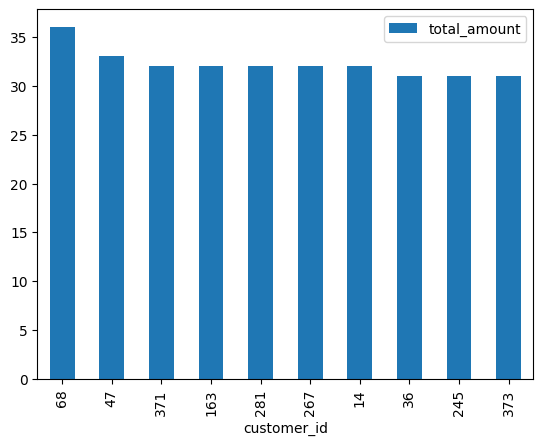

In [114]:
#bar chart
sales_by_customer = df[['total_amount','customer_id']].groupby('customer_id').count()
sales_by_customer.sort_values(by="total_amount", ascending=False).head(10).plot.bar()

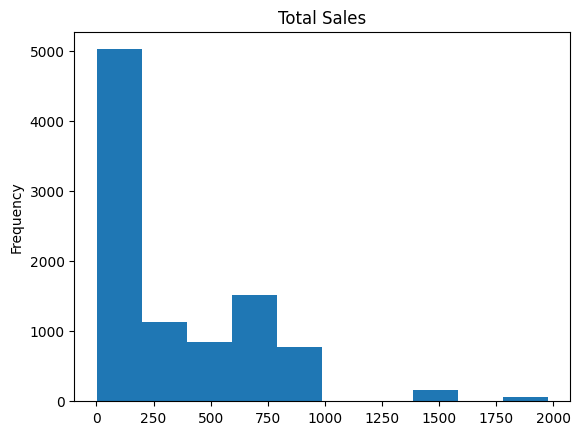

In [115]:
#histogram
hist = df['total_amount'].plot.hist(bins=10,title='Total Sales')

<Axes: title={'center': 'total_amount'}, xlabel='[order_month]'>

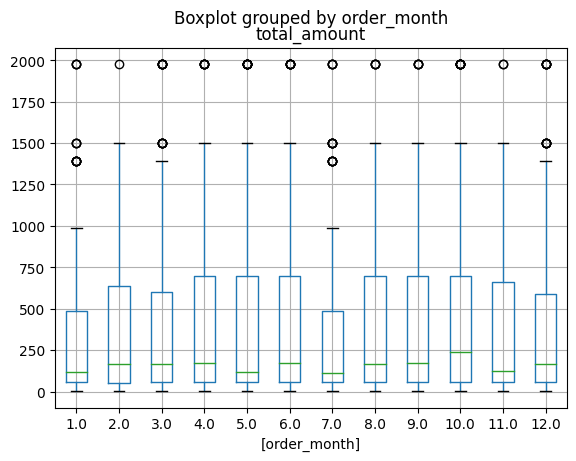

In [116]:
#box plot
df['order_month'] = df['order_month'].str.replace(' ', '')
df['order_month'] = pd.to_datetime(df['order_month'], format='%B').dt.month
df = df.sort_values(by='order_month')
df[['order_month','total_amount']].boxplot(by='order_month')

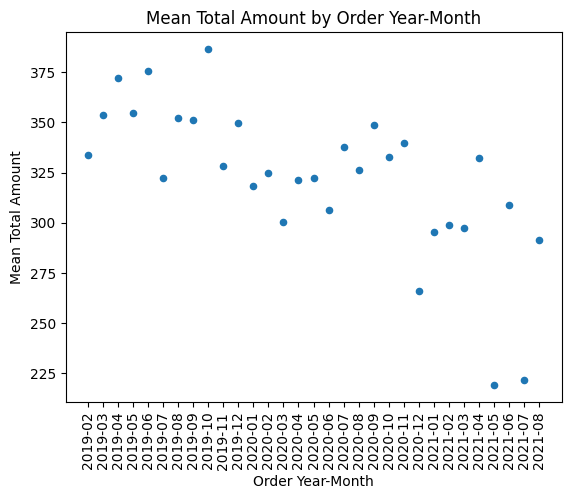

In [117]:
#scatter plot

x = 'order_year_month'
y = 'total_amount'

grouped_data = df.groupby('order_year_month')['total_amount'].mean()
grouped_df = grouped_data.reset_index()

grouped_df.plot(kind='scatter', x=x, y=y)

plt.xlabel('Order Year-Month')
plt.ylabel('Mean Total Amount')
plt.title('Mean Total Amount by Order Year-Month')

plt.xticks(rotation=90)

plt.show()


## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

<Axes: xlabel='order_month'>

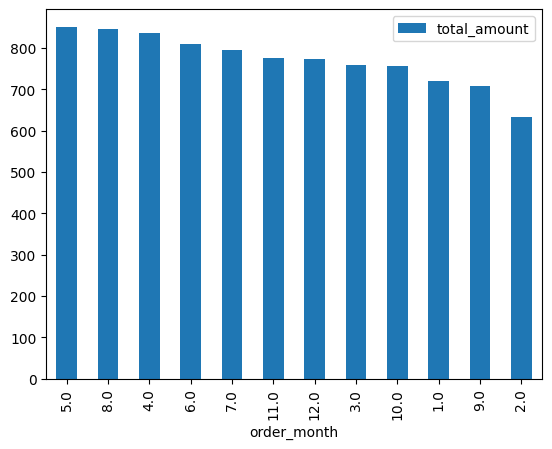

In [118]:
#month of year

sales_by_month = df[['total_amount','order_month']].groupby('order_month').count()
sales_by_month.sort_values(by="total_amount", ascending=False).plot.bar()

In [119]:
df['state_province'].unique()

array(['DE ', 'IN ', 'Texas  ', 'Maryland ', 'CO ', 'South Dakota  ',
       'TX ', 'FL ', 'VA ', 'Florida ', 'CA ', 'Kansas ', 'MD ', 'NC ',
       'MO ', 'WV ', 'OR ', 'NY ', 'DC ', 'Virginia ', 'Washington ',
       'Georgia ', 'California ', 'AL ', 'GA ', 'OK ', 'PA ',
       'Louisiana ', 'NV ', 'New York ', 'UT ', 'AK ', 'KY ', 'Utah ',
       'Hawaii ', 'MI ', 'MN ', 'NJ ', 'West Virginia ', 'Connecticut ',
       'IA ', 'CT ', 'NM ', 'AZ ', 'MA ', 'TN ', 'NE ', 'Nevada ', 'LA ',
       'MT ', 'North Dakota  ', 'Oklahoma ', 'NewYork ', 'Ohio ',
       'Indiana ', 'KS ', 'WI ', 'OH ', 'Kentucky ', 'IL ', 'Illinois ',
       'NH ', 'Alabama ', 'Tennessee ', 'North Carolina ', 'SC ',
       'Massachusetts ', 'WY ', 'Alaska ', 'SD ', 'Missouri ',
       'District of Columbia ', 'WA ', 'Minnesota ', 'Michigan ', 'ND ',
       'MS ', 'HI ', 'Wisconsin ', 'Pennsylvania  ', 'New Jersey ',
       'South Carolina ', 'Iowa ', 'Colorado ', 'Arkansas ', 'AR ',
       'New Mexico ', 'Oregon '

In [120]:
import pandas as pd

state_codes = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

def map_state(state):
    return state_codes.get(state.strip(), state.strip())

df['state_province'] = df['state_province'].apply(map_state)

df['state_province']

0       DE
3538    IN
7359    TX
7351    TX
7350    MD
        ..
9475    CA
9501    FL
9523    CA
9528    TX
9544    FL
Name: state_province, Length: 9569, dtype: object

<Axes: xlabel='state_province'>

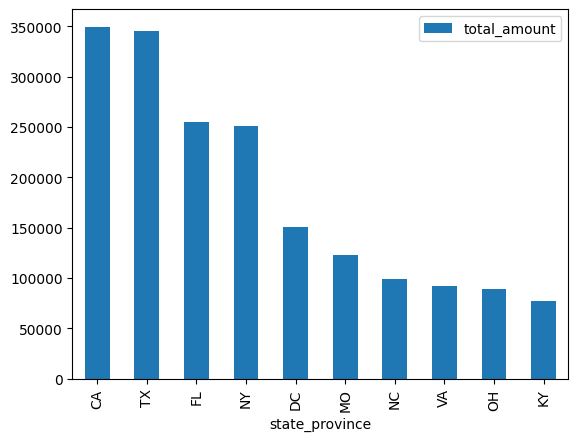

In [121]:
#sales by state
sales_by_state = df[['total_amount','state_province']].groupby('state_province').sum()
sales_by_state.sort_values(by="total_amount", ascending=False).head(10).plot.bar()

<Axes: xlabel='product_id'>

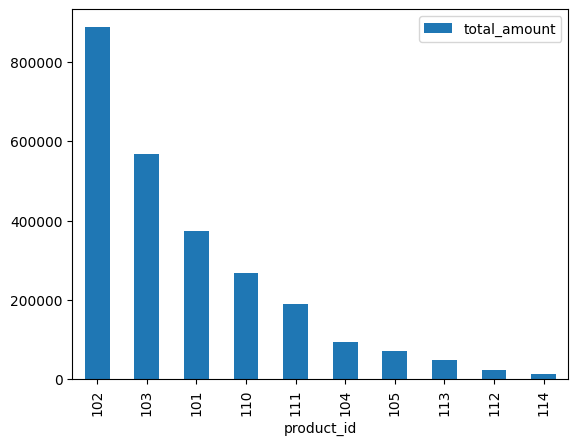

In [122]:
#sales by product
sales_by_product = df[['total_amount','product_id']].groupby('product_id').sum()
sbp_head = sales_by_product.head(5)
sbp_tail = sales_by_product.tail(5)
combined_df = pd.concat([sbp_head, sbp_tail])
combined_df.sort_values(by="total_amount", ascending=False).plot.bar()

## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

In [ ]:
#pair plot
sb.pairplot(df, hue='total_amount')